Machine Learning (M124) - Homework 1

<u>Student credentials</u><br>
**FullName:** Spanos Nikolaos<br>
**Student AM:** 7115112100023<br>
**Student email:** cs2210023@di.uoa.gr <br><br>


**Supervisor(s):** Associate Professor Panagakis G., Panousis K. PhD<br>
*All rights reserved from National and Kapodistrian University of Athens, Department of Computer Science (DI)*

Athens, Greece, April 2023

In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
np.random.seed(123)

**Disclaimer (1):** I kept the output of the cells in case the random.seed function does not produce the same results.

**Disclaimer (2):** I In the second part of exercise 3, for calculating the gradient descent of the second cost function, experiment *3.2.1* and *3.2.2* have failed execution cells because the generated solution from the algorithm had very high cost values (very close to infinity). Thus, I left the cells as is to prove that for very high learning rates the second cost function does not converge,

### Ερώτημα 1: Πράξεις με Διανύσματα και Πίνακες

Δύο τυχαίους πίνακες ακέραιων αριθμών $X∈Ζ^{3x4}$ και $Υ∈Ζ^{4x3}$ </br>
Δύο τυχαία διανύσματα ακέραιων αριθμών $a∈Ζ^{4}$ και $b∈Ζ^{4}$


In [ ]:
X = np.random.randint(1,30,(3,4))
Y = np.random.randint(1,30,(4,3))
a = np.random.randint(1,30,4)
b = np.random.randint(1,30,4)

print("X", X)
print("Y", Y)
print("a", a)
print("b", b)

X [[16 10 20 21]
 [ 3  9 26 29]
 [29  1 25 10]]
Y [[ 3 11 10]
 [20  4 10]
 [22 17  7]
 [ 4 22 22]]
a [ 9 14 25 18]
b [ 2  7 18 19]


#### 1.1 Να υπολογίσετε το εσωτερικό γινόμενο των διανυσμάτων $a$ και $b$, δηλαδή $a⋅b$

Calculation: </br>
$[9*2 + 14*7 + 25*18 + 18*19] = [18 + 98 + 450 + 342] = 908$


In [ ]:
dot_product = np.dot(a,b)
dot_product

908

#### 1.2 Να υπολογίσετε το γινόμενο πίνακα-διανύσματος $X ̇ a∈Ζ^{3}$

Calculation: </br>
$[16*9 + 10*14 + 20*25 + 21*18] = 1162$ (1st integer result) </br>
$[3*9 + 9*14 + 26*25 + 29*18] = 1325$ (2nd integer result) </br>
$[29*9 + 1*14 + 25*25 + 10*18] = 1080$ (3rd integer result)

In [ ]:
dot_product_matrix_vector = np.dot(X,a)
dot_product_matrix_vector

array([1162, 1325, 1080])

#### 1.3 Να υπολογίσετε το γινόμενο πινάκων $X ̇ Y∈Ζ^{3x3}$
X = 
$\begin{bmatrix}
16 & 10 & 20 & 21 & (a_1) \\
3 & 9 & 26 & 29 & (a_2)\\
29 & 1 & 25 & 10 & (a_3)
\end{bmatrix}$ </br>

Y = $\begin{bmatrix}
(b_1) & (b_2) & (b_3) \\
3 & 11 & 10 \\
20 & 4 & 10 \\
22 & 17 & 7 \\
4 & 22 & 22
\end{bmatrix}$ </br>

with $a_1 \ldots a_n$ denoting the rows of the matrix $X$ and $b_1 \dots b_n$ denoting the columns of matrix $Y$. Then the dot product of the two matrices can be calculated using the following formula: </br>

$X\cdot{Y}$ =
$\begin{bmatrix}
(a_1\cdot{b_1}) & (a_1\cdot{b_2}) & (a_1\cdot{b_3}) \\
(a_2\cdot{b_1}) & (a_2\cdot{b_2}) & (a_2\cdot{b_3}) \\
(a_3\cdot{b_1}) & (a_3\cdot{b_2}) & (a_3\cdot{b_3})
\end{bmatrix} =\\ $
$\begin{bmatrix}
(16*3 + 10*20 + 20*22 + 21*4) & (16*11 + 10*4 + 20*17 + 21*22) & (16*10 + 10*10 + 20*7 + 21*22) \\
(3*3 + 9*20 + 26*22 + 29*4) & (3*11 + 9*4 + 26*17 + 29*22) & (3*10 + 9*10 + 26*7 + 29*22) \\
(29*3 + 1*20 + 25*22 + 10*4) & (29*11 + 1*4 + 25*17 + 10*22) & (29*10 + 1*10 + 25*7 + 10*22)
\end{bmatrix} = \\ $
$\begin{bmatrix}
(18 + 200 +440 + 84) & (176 + 40 + 340 + 462) & (160 + 100 + 140 + 462) \\
(9 + 180 + 572 + 116) & (33 + 36 + 182 + 638) & (30 + 90 + 182 + 638) \\
(87 + 20 + 550 + 40) & (319 + 4 + 425 + 220) & (290 + 10 + 175 + 220)
\end{bmatrix} = \\ $
$\begin{bmatrix}
772 & 1018 & 862 \\
877 & 1149 & 940 \\
697 & 968 & 695
\end{bmatrix}$

In [ ]:
dot_product_matrices = np.dot(X,Y)
dot_product_matrices

array([[ 772, 1018,  862],
       [ 877, 1149,  940],
       [ 697,  968,  695]])

#### 1.4 Να υπολογίσετε την Ευκλείδεια νόρμα (l2-norm) του διανύσματος $a$

Step: 
1. Raise all numbers in the vector to the power of 2 ($a^2$)
2. Calculate the total sum of the squares of each number in the vector ($\sum{a^2_i}$)
3. Calculate the square root of the final summation result ($\sqrt{\sum{a^2_i}}$)

, where $a$ is the vector and $i$ each number in the vector array.

Calculation:

Step 1: $[9^2, 14^2, 25^2, 18^2] = [81, 196, 625, 324]$ </br>
Step 2: $[81 + 196 + 625 + 324] = 1226 $ </br>
Step 3: $\sqrt{1226} = 35.0142828 $

In [ ]:
a_power = [a**2]
a_sum = np.sum(a_power)
a_square_root = math.sqrt(a_sum)

print("L2-norm of vector a: ", np.round(a_square_root,3))
# or second method:
print("L2-norm using numpy built-in method: ", np.linalg.norm(a))

L2-norm of vector a:  35.014


### Ερώτημα 2: Υπολογισμός παραγώγων

####2.1 Η παράγωγος της $f(x) = x^TAx + b^Tx$ ως προς το διανυσμα $x∈ℛ^d$



$f(x) = x^TAx + b^Tx$ (1)

The above expression can split into two different parts,

* $x^TAx$
* $b^T$

Thus, I have to compute two different derivates.

$\frac{dx^TAx}{d{x}}$ (2) and $\frac{db^Τx}{d{x}}$ (3) respectively.

Lets start with interpreting the expression (2) in a mathematical way:

$x^T$ = ($x_1$ $x_2$) (4) </br>
$A$ = $\begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{pmatrix}$  and since $A$ is a symmetric matric this expression can be written as $A$ = $\begin{pmatrix}
a_{11} & a \\
a & a_{22} \\
\end{pmatrix}$ (5)</br>
$x$ = $\begin{pmatrix}
x_1\\
x_2 \\
\end{pmatrix}$ (6)

As a result $x^TAx = (x_1 x_2)\begin{pmatrix}
a_{11} & a \\
a & a_{22} \\
\end{pmatrix}\begin{pmatrix}
x_1\\
x_2 \\
\end{pmatrix}$ (7)

Let's now take the dot product of expressions (5) and (6):

$\begin{pmatrix}
a_{11}x_1 + ax_2\\
ax_1 + a_{22}x_2 \\
\end{pmatrix}$

Replacing this to expression (7) we have:

$x^TAx = (x_1 x_2)\begin{pmatrix}
a_{11}x_1 + ax_2\\
ax_1 + a_{22}x_2 \\
\end{pmatrix}$

Again applying the product rule we get:

$a_{11}x_1^2 + ax_1x_2 + ax_1x_2 + a_{22}x_2^2 = a_{11}x_1^2 + 2ax_1x_2 + a_{22}x_2^2$ (8)

Let's call expression (8) a function $f(x_1,x_2)$

Returning to our initial goal, I am looking for the derivative of this linear transformation $x^TAx$ w.r.t $x$: $\frac{dx^TAx}{d{x}}$

Simplifying this I am looking for 

$\begin{pmatrix}
\frac{df}{dx_1}\\
\frac{df}{dx_2}
\end{pmatrix}$

$\frac{df}{dx_1} = 2a_{11}x_1 + 2ax_2$, and

$\frac{df}{dx_2} = 2ax_1 + 2a_{22}x_2$

$\begin{pmatrix}
\frac{df}{dx_1}\\
\frac{df}{dx_2}
\end{pmatrix}$ = $\begin{pmatrix}
2a_{11}x_1 + 2ax_2\\
2ax_1 + 2a_{22}x_2
\end{pmatrix}$ = 2$\begin{pmatrix}
a_{11}x_1 + ax_2\\
ax_1 + a_{22}x_2
\end{pmatrix}$ = 2$\begin{pmatrix}
a_{11} & a\\
a & a_{22}
\end{pmatrix}$$\begin{pmatrix}
x_1\\
x_2
\end{pmatrix} = 2Ax$

Thus, $\frac{dx^TAx}{d{x}} = 2Ax$

Moving on to $\frac{db^Τx}{d{x}}$

Since $b$ is a constant vector of real values and $x$ is also a vector,

$\frac{db^Τx}{d{x}} = \frac{d}{d{x}}(\sum{b_i}x_i) = ∑\frac{d}{d{x}}(b_ix_i) = ∑b_i\frac{dx_i}{d{x}} $ (9)

Since $b$ is a constant vector, $b_i$ is a constant w.r.t $x$, so  $\frac{d b_i}{dx} = 0$. Therefore using expression (9),

$\frac{db^Τx}{d{x}} = ∑b_i\frac{dx_i}{d{x}} = ∑b_i(1) = b_1 + b_2 + b_3 + ... + b_n = b$

Thus, I proved that $\frac{db^Τx}{d{x}} = b$, which is also written in expession (69) of the matrix cookbook pg. 10

Finally,

$\frac{df}{d{x}} = 2Ax + b$


####2.2 Absolute minimum for $\parallel{A-XB}∥^2_F$

Based on theory we know the following two concepts:

1. The Frobenius norm of a matrix A is defined as the square root of the sum of the squared entries of A, which can be expressed as $\parallel{A}∥^2_F = \sum_{i,j}A_{i,j}^2$.

2. If rank(A) = d, where d is a dimention of A, then is invertible.

To find the equation's global minimum I will take the derivative of $\parallel{A-XB}∥^2_F$ with respect to X and set it equal to 0. Unfolding of Forbenius-norm, as descibed above:

$\frac{\partial}{\partial X} \parallel{A-XB}∥^2_F = \frac{\partial}{\partial X} \sum_{i,j}(A_{i,j}-\sum_{k}X_{i,k}B_{k,j})^2$

Expanding the squared term (after applying the chain rule):

$\frac{\partial}{\partial X} \sum_{i,j}(A_{i,j}-\sum_{k}X_{i,k}B_{k,j})^2 = \sum_{i,j}2(A_{i,j}-\sum_{k}X_{i,k}B_{k,j})\frac{∂}{∂X}(A_{i,j}-\sum_{k}X_{i,k}B_{k,j})$ (1)

Next by using the product rule I can differentiate the term inside the parenthesis:

$\frac{∂}{∂X}(A_{i,j}-\sum_{k}X_{i,k}B_{k,j}) = \frac{∂}{∂X}(A_{i,j}) - \frac{∂}{∂X_{i,k}}\sum_{k}X_{i,k}B_{k,j} = 0 -1*B_{i,j} = -B_{i,j}$ (2)

Replacing (2) in (1), I have:

$\sum_{i,j}2(A_{i,j}-\sum_{k}X_{i,k}B_{k,j})\frac{∂}{∂X}(A_{i,j}-\sum_{k}X_{i,k}B_{k,j}) = \sum_{i,j}2(A_{i,j}-\sum_{k}X_{i,k}B_{k,j})*(-B_{i,j})$ 

Thus,

$\frac{\partial}{\partial X} \sum_{i,j}(A_{i,j}-\sum_{k}X_{i,k}B_{k,j})^2 = \sum_{i,j}2(A_{i,j}-\sum_{k}X_{i,k}B_{k,j})*(-B_{i,j}) = -2\sum_{i,j}(A_{i,j}-\sum_{k}X_{i,k}B_{k,j})*(B_{i,j})$ (3)

Simplifying expression (3):

$\frac{\partial}{\partial X} \parallel{A-XB}∥^2_F = -2B(A-XB)$

Setting this derivative equal to zero and solving for X:

$-2B(A-XB) = 0$

$XB = A$

$X = AB^{-1}$

Therefore, the absolute minimum of the function $\parallel{A-XB}∥^2_F$ is achieved when $X = AB^{-1}$, and the minimum value of the function is $\parallel{A-AB^{-1}B}∥^2_F = \parallel{A-A}∥^2_F = 0$.

### Ερώτημα 3: Gradient Descent algorithm

#### Initiallize functions that will be used in this question

In [ ]:
#Early stopping
class EarlyStopper:
  """
  Definition
  ---------
  Apply Early Stopping mechanism when the cost function calculated per iteration is not improving (converged towards a global/local minimum).

  Arguments
  ---------
  patience: For how many iterations we tolerate no improvements in cost function.
  min_delta: The difference between cost function at iterations (t) and (t-1).
  calculated_cost: cost function at iteration (t).

  Output
  ---------
  Break the gradient descent algorithm if patience threshold exceeds the default value.
  """
  def __init__(self, patience=3, min_delta=0.000001):
    self.patience = patience
    self.min_delta = min_delta
    self.counter = 0
    self.min_cost = np.inf

  def early_stop(self, calculated_cost):
    boolean_state:bool = None

    if calculated_cost < self.min_cost:
      self.min_cost = calculated_cost
      self.counter = 0
  
    elif (calculated_cost - self.min_cost) <= self.min_delta:
      self.counter += 1
      if self.counter >= self.patience:
        boolean_state = True
        return boolean_state, calculated_cost
    
    boolean_state = False
    return boolean_state, calculated_cost

# Learning curve
def learning_curve(checkpoints, values):
  """
  Definition
  ---------
  Plot the learning curve of the gradient descent optimization algorithm.

  Arguments
  ---------
  checkpoints: The total number of iterations.
  values: The list/array/vector of the computed cost per iteration.

  Output
  ---------
  The learning curve.
  """
  plt.scatter(checkpoints,values)
  plt.xticks(range(len(checkpoints)), checkpoints)
  plt.ylim(0,max(values)+1)
  plt.tick_params(axis='x', which='major', labelsize=7)
  plt.xlabel("iteration")
  plt.ylabel("cost-function")
  plt.title("Gradient descent learning curve")
  
  plt.show()

#### 3.1 Applyting the gradient descent algorithm for the first cost function

$f(x_1, x_2) = (x_1 + 2)^2 + (x_2 - 3)^2$


To perform gradient descent on $f(x_1, x_2) = (x_1 + 2)^2 + (x_2 - 3)^2$, I first need to compute the partial derivatives of the function with respect to $x_1$ and $x_2$:

$\frac{\partial f}{\partial x_1} = 2(x_1 + 2)$

$\frac{\partial f}{\partial x_2} = 2(x_2 - 3)$

Next, I need to initialize our starting point $(x_1^{(0)}, x_2^{(0)})$, and choose a step size $\alpha$.

Let's start with $(x_1^{(0)}, x_2^{(0)}) = (0, 0)$ and $\alpha = 0.1$.

Then use the following update rule to iteratively update the parameters until converge to a minimum:

$x_1^{(t+1)} = x_1^{(t)} - \alpha \frac{\partial f}{\partial x_1}$

$x_2^{(t+1)} = x_2^{(t)} - \alpha \frac{\partial f}{\partial x_2}$

Then stop the algorithm when the change in the value of $f$ between iterations is very small, or when the algorithm reach a maximum number of iterations.

Let's perform the first few iterations of gradient descent starting from $(x_1^{(0)}, x_2^{(0)}) = (0, 0)$:

$t = 0$: $(x_1^{(0)}, x_2^{(0)}) = (0, 0)$

$\frac{\partial f}{\partial x_1} = 2(0 + 2) = 4$

$\frac{\partial f}{\partial x_2} = 2(0 - 3) = -6$

$x_1^{(1)} = 0 - 0.1(4) = -0.4$

$x_2^{(1)} = 0 - 0.1(-6) = 0.6$

Calculating the cost function: $f(-0.4, 0.6) = (-0.4 + 2)^2 + (0.6 - 3)^2 = 2.56 + 5.76 = 8.32$

$t = 1$: $(x_1^{(1)}, x_2^{(1)}) = (-0.4, 0.6)$

$\frac{\partial f}{\partial x_1} = 2(-0.4 + 2) = 3.2$

$\frac{\partial f}{\partial x_2} = 2(0.6 - 3) = -3.8$

$x_1^{(2)} = -0.4 - 0.1(3.2) = -0.72$

$x_2^{(2)} = 0.6 - 0.1(-3.8) = 1.02$

Calculating the cost function: $f(-0.72, 1.02) = (-0.72 + 2)^2 + (1.02 - 3)^2 = 1.6384 + 3.9204 = 5.5588$

Continue this process until convergence towards 0.0 or the maximum number of iterations is reached.

In [ ]:
# Gradient descent algorithm based on the cost function developed in the example above
def descent(x1:float, x2:float, learning_rate:float, iterations:int):
  """
  Definition
  ---------
  Apply the gradient descent algorithm on a specific cost function. The cost function optimized is f(x1,x2) = (x1 + 2)**2 + (x2 - 3)**2

  Arguments
  ---------
  x1: The first predictive parameter of the cost function.
  x2: The second predictive parameter of the cost function.
  learning_rate: The step size applied on the gradient(s).
  iterations: The maximum number of iterations/repetitions of the GD algorithm.

  Output
  ---------
  The calculated cost per iteration, and the maximum number of iterations that have been applied or early stopped.
  """
  early_stopper = EarlyStopper()
  calculated_values = []
  iteration_checkpoint = []
  
  print(f"x1 parameter initialized with value: {x1}")
  print(f"x2 parameter initialized with value: {x2}")

  for iter in range(iterations):
    print(f"\nExecuting iteration: {iter+1}/{iterations}")
    gradient_x1 = 2*(x1 + 2)
    gradient_x2 = 2*(x2 - 3)
    x1 = x1 - learning_rate*gradient_x1
    x2 = x2 - learning_rate*gradient_x2

    #calculate the cost function
    f = (x1 + 2)**2 + (x2 - 3)**2
    print(f"Cost function value on iteration {iter+1}: {np.round(f, 5)}")
    calculated_values.append(np.round(f, 5))
    iteration_checkpoint.append(iter+1)

    #early stopping
    stop_flag, cost_value = early_stopper.early_stop(f)
    if stop_flag:
      print(f"\nEarly stopping applied on iteration number: {iter+1}")
      break

  print("\n--------------------------End of optimization------------------------------------")
  
  print(f"\nThe computed value of x1 on last iteration: {x1}")
  print(f"The computed value of x2 on last iteration: {x2}")

  return calculated_values,iteration_checkpoint

##### 3.1.1 Execute the algorithm for the first cost function and with hyperparameters:
 * $x_1$ = 0
 * $x_2$ = 0
 * learning_rate/step ($a$) = 0.5
 * iterations = 10

x1 parameter initialized with value: 0.0
x2 parameter initialized with value: 0.0

Executing iteration: 1/10
Cost function value on iteration 1: 0.0

Executing iteration: 2/10
Cost function value on iteration 2: 0.0

Executing iteration: 3/10
Cost function value on iteration 3: 0.0

Executing iteration: 4/10
Cost function value on iteration 4: 0.0

Early stopping applied on iteration number: 4

--------------------------End of optimization------------------------------------

The computed value of x1 on last iteration: -2.0
The computed value of x2 on last iteration: 3.0

The calculated values of the cost function:  [0.0, 0.0, 0.0, 0.0] 



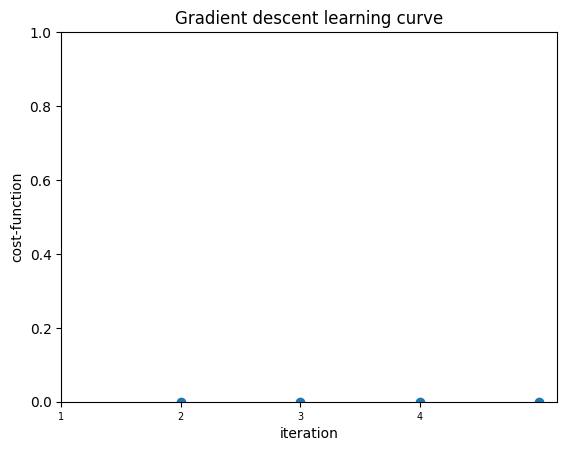

In [ ]:
values,checkpoints = descent(0.0,0.0,0.5,10)
print("\nThe calculated values of the cost function: ", values, "\n")
learning_curve(checkpoints,values)

With learning rate equal to 0.5, we found the values of $x_1$, $x_2$ that minimize the cost function to 0.0 very early on the 4th iteration. </br>
The parameter $x_1$ with value: -2.0 </br>
The parametter $x_2$ with value: 3.0

##### 3.1.2 Hyperparameters
 * $x_1$ = 0
 * $x_2$ = 0
 * learning_rate/step ($a$) = 0.9 (high)
 * iterations = 20

x1 parameter initialized with value: 0.0
x2 parameter initialized with value: 0.0

Executing iteration: 1/20
Cost function value on iteration 1: 8.32

Executing iteration: 2/20
Cost function value on iteration 2: 5.3248

Executing iteration: 3/20
Cost function value on iteration 3: 3.40787

Executing iteration: 4/20
Cost function value on iteration 4: 2.18104

Executing iteration: 5/20
Cost function value on iteration 5: 1.39586

Executing iteration: 6/20
Cost function value on iteration 6: 0.89335

Executing iteration: 7/20
Cost function value on iteration 7: 0.57175

Executing iteration: 8/20
Cost function value on iteration 8: 0.36592

Executing iteration: 9/20
Cost function value on iteration 9: 0.23419

Executing iteration: 10/20
Cost function value on iteration 10: 0.14988

Executing iteration: 11/20
Cost function value on iteration 11: 0.09592

Executing iteration: 12/20
Cost function value on iteration 12: 0.06139

Executing iteration: 13/20
Cost function value on iteration 13:

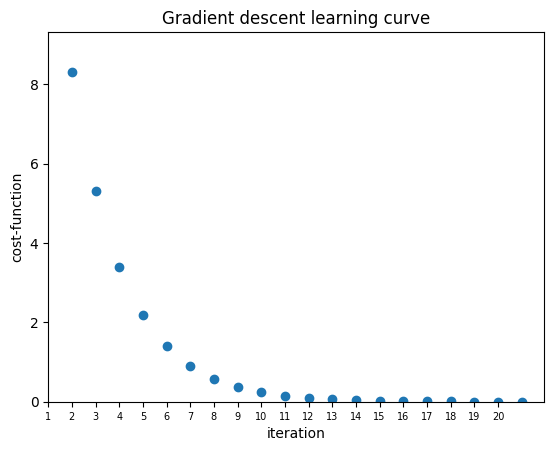

In [ ]:
values,checkpoints = descent(0.0,0.0,0.9,20)
print("\nThe calculated values of the cost function: ", values, "\n")
learning_curve(checkpoints,values)

##### 3.1.3 Hyperparameters
 * $x_1$ = 0
 * $x_2$ = 0
 * learning_rate/step ($a$) = 0.9 (high)
 * iterations = 30 (20+10 more iterations to check the convergence)

x1 parameter initialized with value: 0.0
x2 parameter initialized with value: 0.0

Executing iteration: 1/30
Cost function value on iteration 1: 8.32

Executing iteration: 2/30
Cost function value on iteration 2: 5.3248

Executing iteration: 3/30
Cost function value on iteration 3: 3.40787

Executing iteration: 4/30
Cost function value on iteration 4: 2.18104

Executing iteration: 5/30
Cost function value on iteration 5: 1.39586

Executing iteration: 6/30
Cost function value on iteration 6: 0.89335

Executing iteration: 7/30
Cost function value on iteration 7: 0.57175

Executing iteration: 8/30
Cost function value on iteration 8: 0.36592

Executing iteration: 9/30
Cost function value on iteration 9: 0.23419

Executing iteration: 10/30
Cost function value on iteration 10: 0.14988

Executing iteration: 11/30
Cost function value on iteration 11: 0.09592

Executing iteration: 12/30
Cost function value on iteration 12: 0.06139

Executing iteration: 13/30
Cost function value on iteration 13:

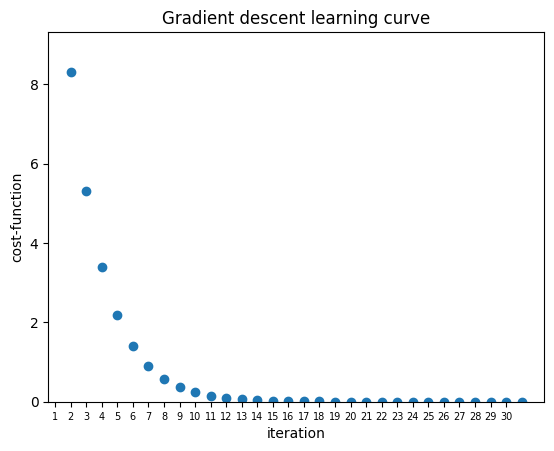

In [ ]:
values,checkpoints = descent(0.0,0.0,0.9,30)
print("\nThe calculated values of the cost function: ", values, "\n")
learning_curve(checkpoints,values)

The cost function after 30 iterations is even closer towards to 0.0 reaching to 0.00002. </br>
Even the values of the dependent parameters $x_1$, $x_2$ are reaching the -2.0, 3.0 values respectively. </br>

On 30 iterations the value of $x_1$=-1.997524119921429 and $x_2$ = 2.996286179882144. So it's very probable that increasing even more the number of iterations by keeping the learning rate at 0.9 will converge the cost function towards 0.0

##### 3.1.4 Hyperparameters
 * $x_1$ = 0
 * $x_2$ = 0
 * learning_rate/step ($a$) = 1.25 (very high)
 * iterations = 5

x1 parameter initialized with value: 0.0
x2 parameter initialized with value: 0.0

Executing iteration: 1/5
Cost function value on iteration 1: 29.25

Executing iteration: 2/5
Cost function value on iteration 2: 65.8125

Executing iteration: 3/5
Cost function value on iteration 3: 148.07812

Executing iteration: 4/5
Cost function value on iteration 4: 333.17578

Executing iteration: 5/5
Cost function value on iteration 5: 749.64551

--------------------------End of optimization------------------------------------

The computed value of x1 on last iteration: -17.1875
The computed value of x2 on last iteration: 25.78125

The calculated values of the cost function:  [29.25, 65.8125, 148.07812, 333.17578, 749.64551] 



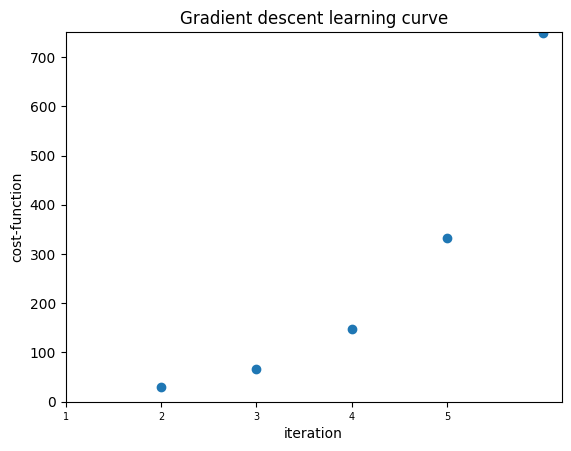

In [ ]:
values,checkpoints = descent(0.0,0.0,1.25,5)
print("\nThe calculated values of the cost function: ", values, "\n")
learning_curve(checkpoints,values)

We can see that for a high learning rate (>=1.0) the convergence goes towards high positive numbers. Validating the below image taken from CS231 course on neural networks of Standford University.

Learning rates curves (Credits to: https://cs231n.github.io/neural-networks-3/)

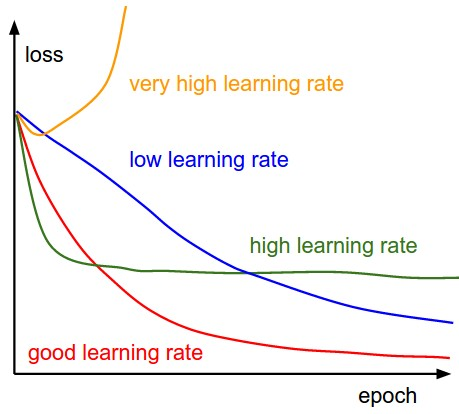

##### 3.1.5 Hyperparameters
 * $x_1$ = (initialize with a random number from numpy.random module)
 * $x_2$ = (initialize with a random number from numpy.random module)
 * learning_rate/step ($a$) = 0.9 (high)
 * iterations = 30

x1 parameter initialized with value: 4.3
x2 parameter initialized with value: 9.9

Executing iteration: 1/30
Cost function value on iteration 1: 55.872

Executing iteration: 2/30
Cost function value on iteration 2: 35.75808

Executing iteration: 3/30
Cost function value on iteration 3: 22.88517

Executing iteration: 4/30
Cost function value on iteration 4: 14.64651

Executing iteration: 5/30
Cost function value on iteration 5: 9.37377

Executing iteration: 6/30
Cost function value on iteration 6: 5.99921

Executing iteration: 7/30
Cost function value on iteration 7: 3.83949

Executing iteration: 8/30
Cost function value on iteration 8: 2.45728

Executing iteration: 9/30
Cost function value on iteration 9: 1.57266

Executing iteration: 10/30
Cost function value on iteration 10: 1.0065

Executing iteration: 11/30
Cost function value on iteration 11: 0.64416

Executing iteration: 12/30
Cost function value on iteration 12: 0.41226

Executing iteration: 13/30
Cost function value on iteratio

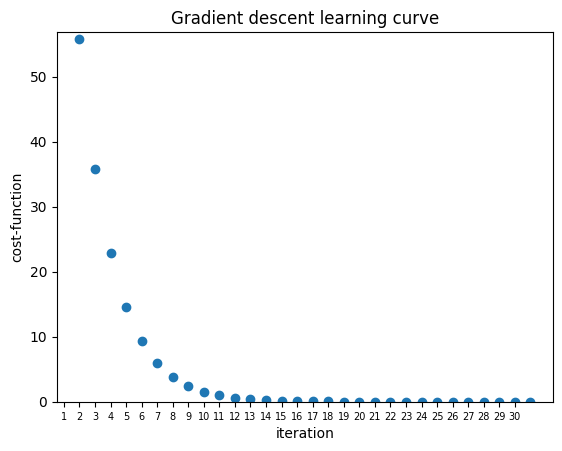

In [ ]:
values,checkpoints = descent(np.round(np.random.uniform(1,5),1), np.round(np.random.uniform(5,10),1),0.9,30)
print("\nThe calculated values of the cost function: ", values, "\n")
learning_curve(checkpoints,values)

Initiliazing the parameters $x_1$, $x_2$ with random values didn't affect the performance of the gradient descent algorithm on leanring_rate = 0.9 and 30 iterations. Very similiar results to when the two parameters have been initialized from 0.0 (check example *3.1.3*). It's worth mentioning that in this experiment (with randomly value assignments) the *$x_2$* parameter converged on value 3.0 after the 30th iteration. Whereas, on experiment *3.1.3* the same parameter had a value 2.99 not 3.0 yet. Thus, we can conclude that initiliazing the parameters from a random value and keeping the rest of the hyperparameters same, the gradient descent algorithm converged quicker towards 0.0

x1 parameter initialized with value: 0.4
x2 parameter initialized with value: 7.1

Executing iteration: 1/100
Cost function value on iteration 1: 14.4448

Executing iteration: 2/100
Cost function value on iteration 2: 9.24467

Executing iteration: 3/100
Cost function value on iteration 3: 5.91659

Executing iteration: 4/100
Cost function value on iteration 4: 3.78662

Executing iteration: 5/100
Cost function value on iteration 5: 2.42344

Executing iteration: 6/100
Cost function value on iteration 6: 1.551

Executing iteration: 7/100
Cost function value on iteration 7: 0.99264

Executing iteration: 8/100
Cost function value on iteration 8: 0.63529

Executing iteration: 9/100
Cost function value on iteration 9: 0.40658

Executing iteration: 10/100
Cost function value on iteration 10: 0.26021

Executing iteration: 11/100
Cost function value on iteration 11: 0.16654

Executing iteration: 12/100
Cost function value on iteration 12: 0.10658

Executing iteration: 13/100
Cost function value o

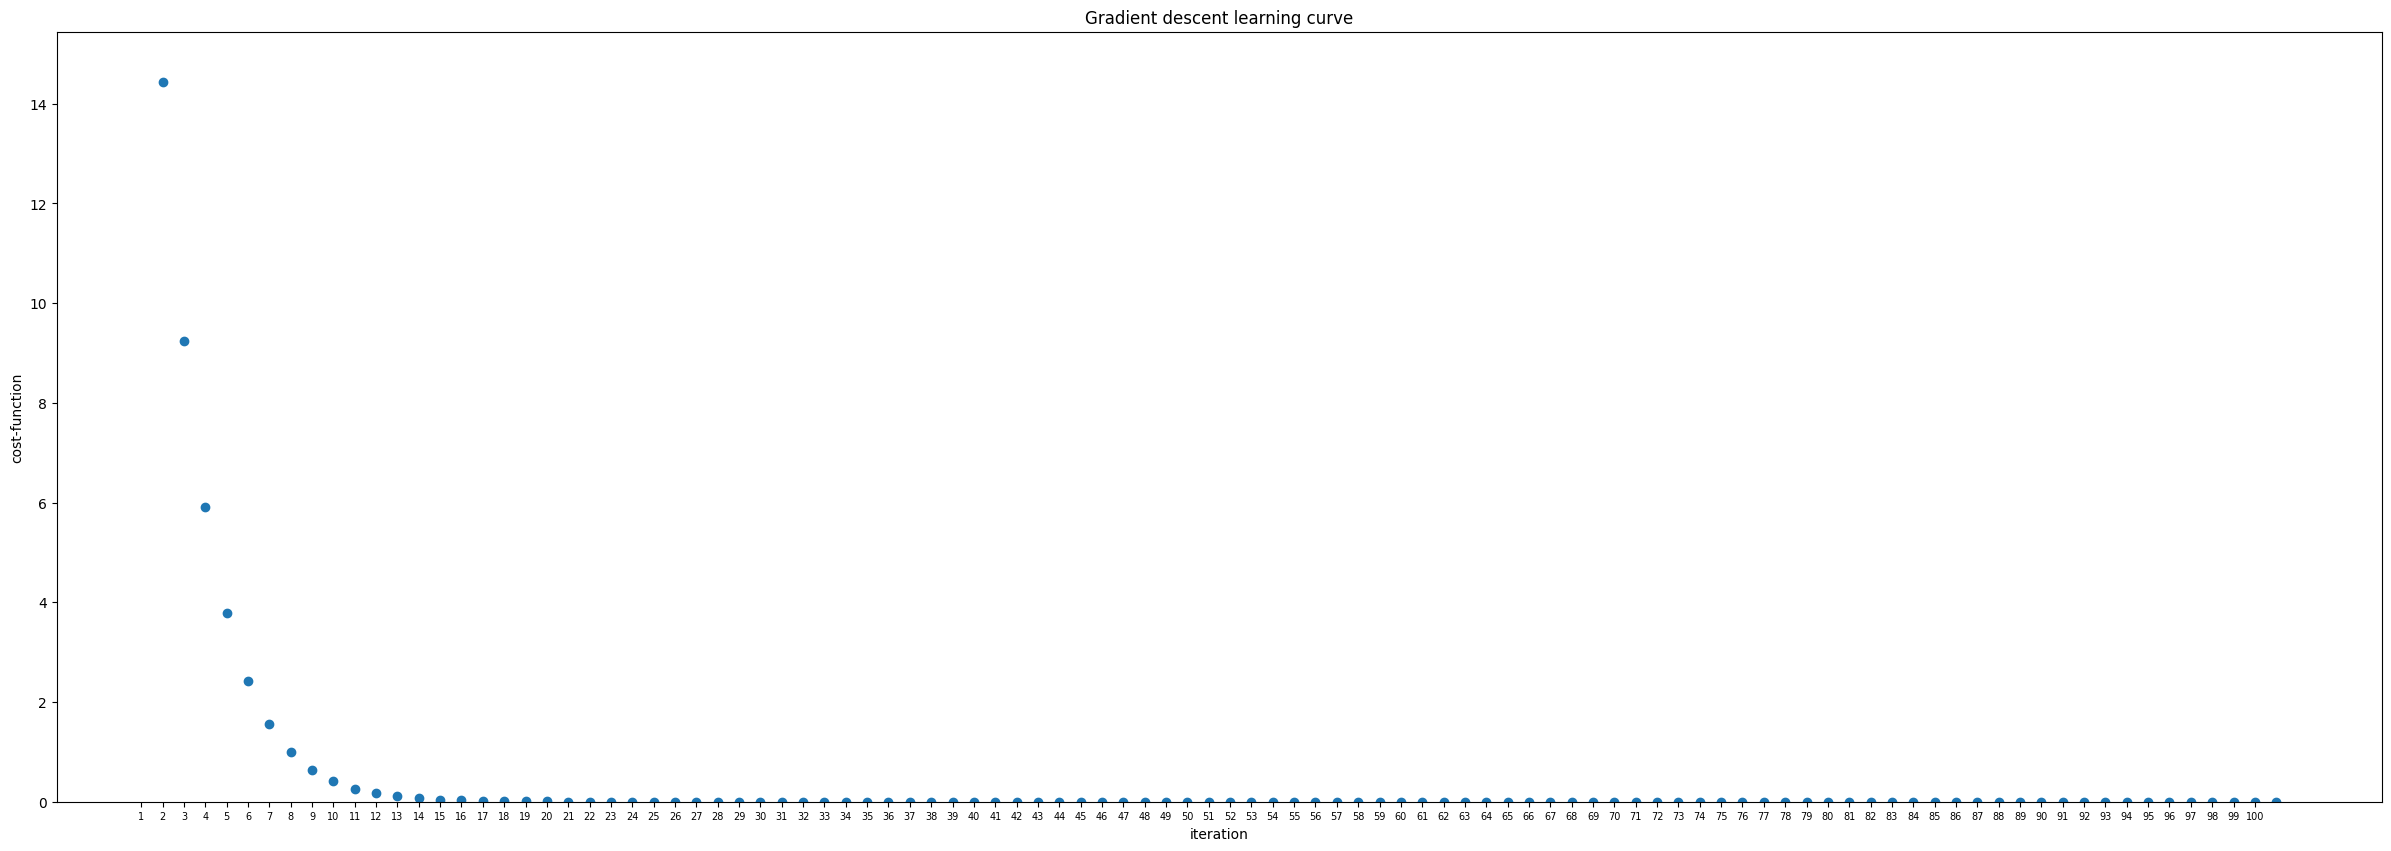

In [ ]:
values,checkpoints = descent(np.round(np.random.uniform(0,5),1), np.round(np.random.uniform(5,10),1),0.9,100)
print("\nThe calculated values of the cost function: ", values, "\n")
learning_curve(checkpoints,values)

For a high value of the learning rate the algorithm converged to 0.0 after the 35th iteration.


##### 3.1.6 Hyperparameters
 * $x_1$ = 0.0
 * $x_2$ = 0.0
 * learning_rate/step ($a$) = 0.01 (small value)
 * iterations = 25

x1 parameter initialized with value: 0.0
x2 parameter initialized with value: 0.0

Executing iteration: 1/25
Cost function value on iteration 1: 12.4852

Executing iteration: 2/25
Cost function value on iteration 2: 11.99079

Executing iteration: 3/25
Cost function value on iteration 3: 11.51595

Executing iteration: 4/25
Cost function value on iteration 4: 11.05992

Executing iteration: 5/25
Cost function value on iteration 5: 10.62195

Executing iteration: 6/25
Cost function value on iteration 6: 10.20132

Executing iteration: 7/25
Cost function value on iteration 7: 9.79735

Executing iteration: 8/25
Cost function value on iteration 8: 9.40937

Executing iteration: 9/25
Cost function value on iteration 9: 9.03676

Executing iteration: 10/25
Cost function value on iteration 10: 8.6789

Executing iteration: 11/25
Cost function value on iteration 11: 8.33522

Executing iteration: 12/25
Cost function value on iteration 12: 8.00514

Executing iteration: 13/25
Cost function value on itera

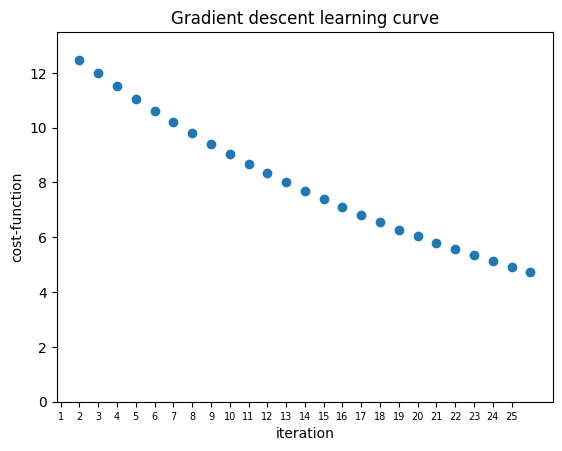

In [ ]:
values,checkpoints = descent(0.0,0.0,0.01,25)
print("\nThe calculated values of the cost function: ", values, "\n")
learning_curve(checkpoints,values)

Expected result, because the step size is relatively small to see an improvement in only 25 iterations. Increasing the number of iterations at two times the current value will help the gradient descent algorithm to descent. Let's check this on the next experiment by increasing the number of iterations and keeping the rest of the hyperparameters same.

x1 parameter initialized with value: 0.0
x2 parameter initialized with value: 0.0

Executing iteration: 1/100
Cost function value on iteration 1: 12.4852

Executing iteration: 2/100
Cost function value on iteration 2: 11.99079

Executing iteration: 3/100
Cost function value on iteration 3: 11.51595

Executing iteration: 4/100
Cost function value on iteration 4: 11.05992

Executing iteration: 5/100
Cost function value on iteration 5: 10.62195

Executing iteration: 6/100
Cost function value on iteration 6: 10.20132

Executing iteration: 7/100
Cost function value on iteration 7: 9.79735

Executing iteration: 8/100
Cost function value on iteration 8: 9.40937

Executing iteration: 9/100
Cost function value on iteration 9: 9.03676

Executing iteration: 10/100
Cost function value on iteration 10: 8.6789

Executing iteration: 11/100
Cost function value on iteration 11: 8.33522

Executing iteration: 12/100
Cost function value on iteration 12: 8.00514

Executing iteration: 13/100
Cost function v

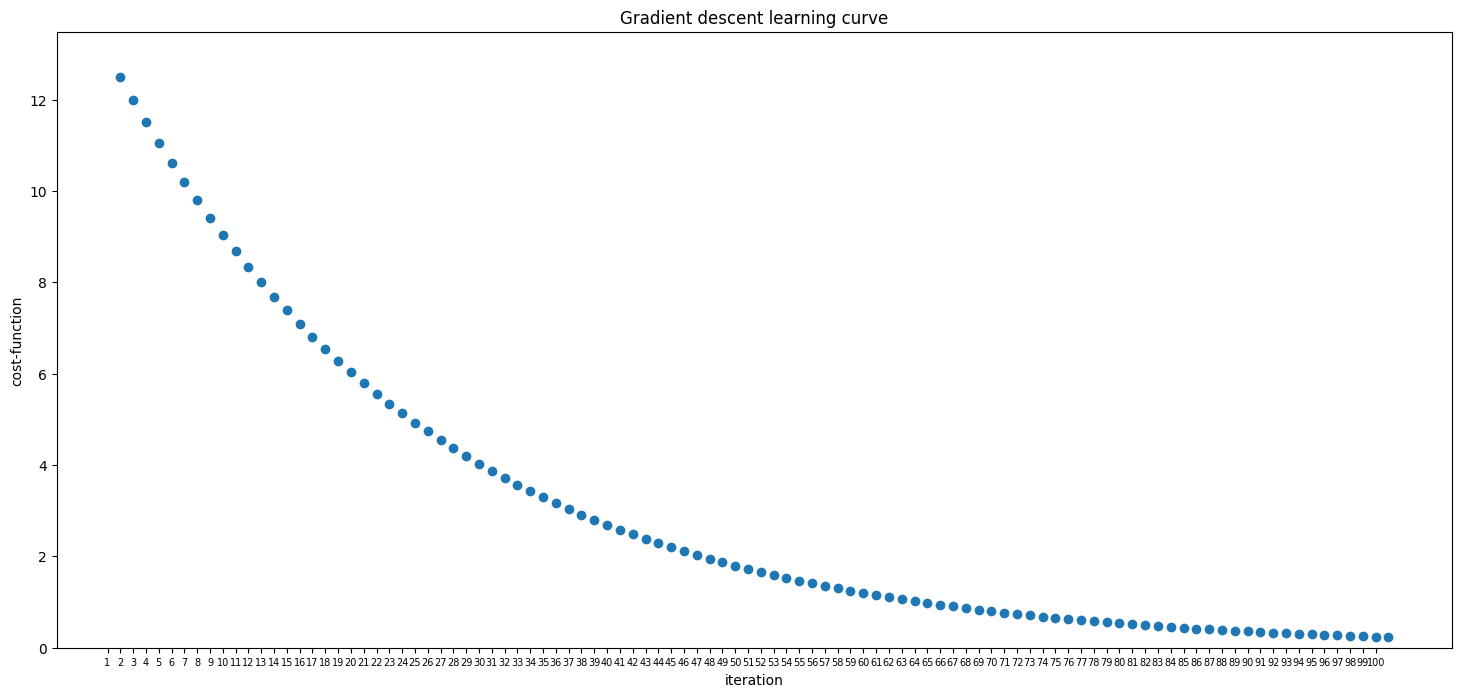

In [ ]:
#increased iterations from 25 to 100 (x4 times the previous value)
values,checkpoints = descent(0.0,0.0,0.01,100)
print("\nThe calculated values of the cost function: ", values, "\n")
plt.rcParams["figure.figsize"] = (18,8)
learning_curve(checkpoints,values)

The assumption was correct. On the 100th iteration the cost function has a very close convergence towards 0.0. Even the values of parameters $x_1$ and $x_2$ start to get closer to the expected values (-2.0) and (3.0) respectively.

x1 parameter initialized with value: 0.0
x2 parameter initialized with value: 0.0

Executing iteration: 1/400
Cost function value on iteration 1: 12.4852

Executing iteration: 2/400
Cost function value on iteration 2: 11.99079

Executing iteration: 3/400
Cost function value on iteration 3: 11.51595

Executing iteration: 4/400
Cost function value on iteration 4: 11.05992

Executing iteration: 5/400
Cost function value on iteration 5: 10.62195

Executing iteration: 6/400
Cost function value on iteration 6: 10.20132

Executing iteration: 7/400
Cost function value on iteration 7: 9.79735

Executing iteration: 8/400
Cost function value on iteration 8: 9.40937

Executing iteration: 9/400
Cost function value on iteration 9: 9.03676

Executing iteration: 10/400
Cost function value on iteration 10: 8.6789

Executing iteration: 11/400
Cost function value on iteration 11: 8.33522

Executing iteration: 12/400
Cost function value on iteration 12: 8.00514

Executing iteration: 13/400
Cost function v

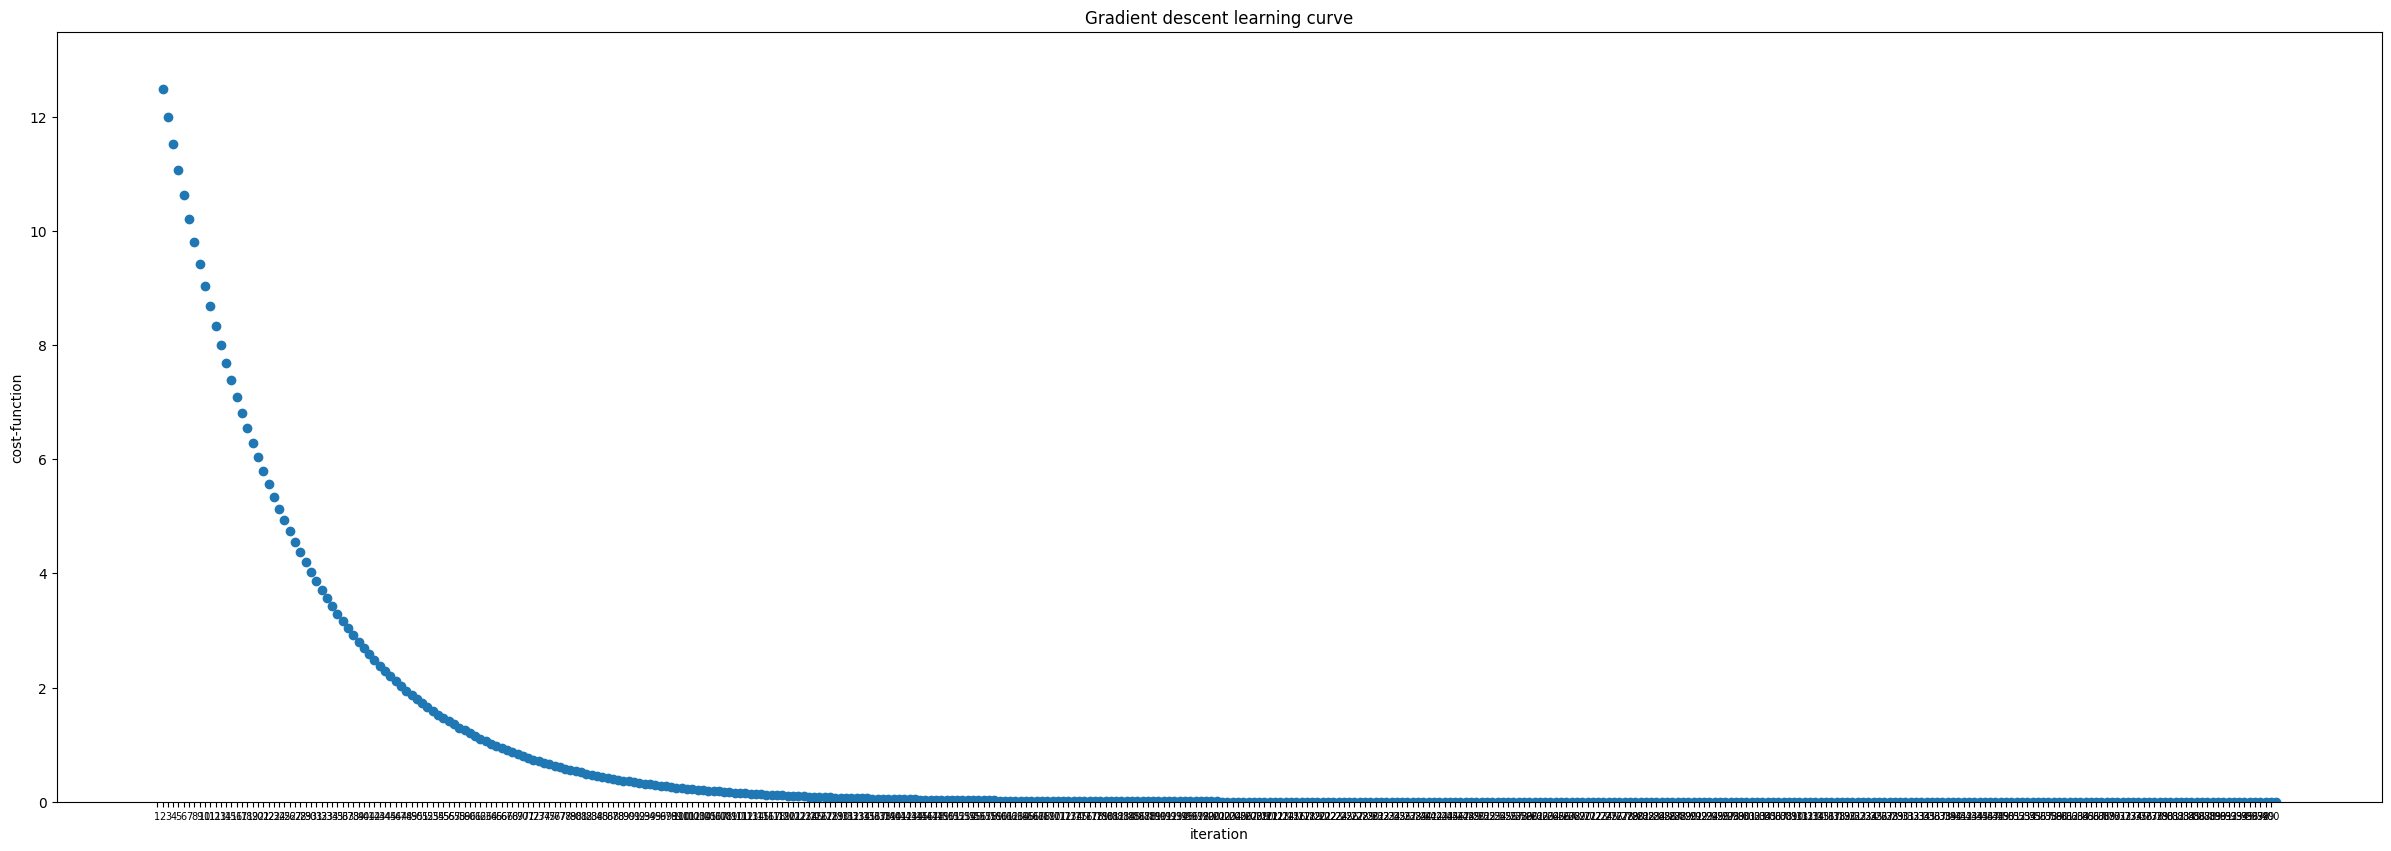

In [ ]:
#increased iterations from 25 to 400 (x16 times the previous value)
values,checkpoints = descent(0.0,0.0,0.01,400)
print("\nThe calculated values of the cost function: ", values, "\n")
plt.rcParams["figure.figsize"] = (30,10)
learning_curve(checkpoints,values)

For a small learnng rate the algorithm converged to 0.0 after 366 iterations based on the results of the experiment above.

##### 3.1.7 Hyperparameters
 * $x_1$ = 0.0
 * $x_2$ = 0.0
 * learning_rate/step ($a$) = 0.001 (very small value)
 * iterations = 25

x1 parameter initialized with value: 0.0
x2 parameter initialized with value: 0.0

Executing iteration: 1/25
Cost function value on iteration 1: 12.94805

Executing iteration: 2/25
Cost function value on iteration 2: 12.89631

Executing iteration: 3/25
Cost function value on iteration 3: 12.84478

Executing iteration: 4/25
Cost function value on iteration 4: 12.79345

Executing iteration: 5/25
Cost function value on iteration 5: 12.74233

Executing iteration: 6/25
Cost function value on iteration 6: 12.69141

Executing iteration: 7/25
Cost function value on iteration 7: 12.64069

Executing iteration: 8/25
Cost function value on iteration 8: 12.59018

Executing iteration: 9/25
Cost function value on iteration 9: 12.53987

Executing iteration: 10/25
Cost function value on iteration 10: 12.48976

Executing iteration: 11/25
Cost function value on iteration 11: 12.43985

Executing iteration: 12/25
Cost function value on iteration 12: 12.39014

Executing iteration: 13/25
Cost function value 

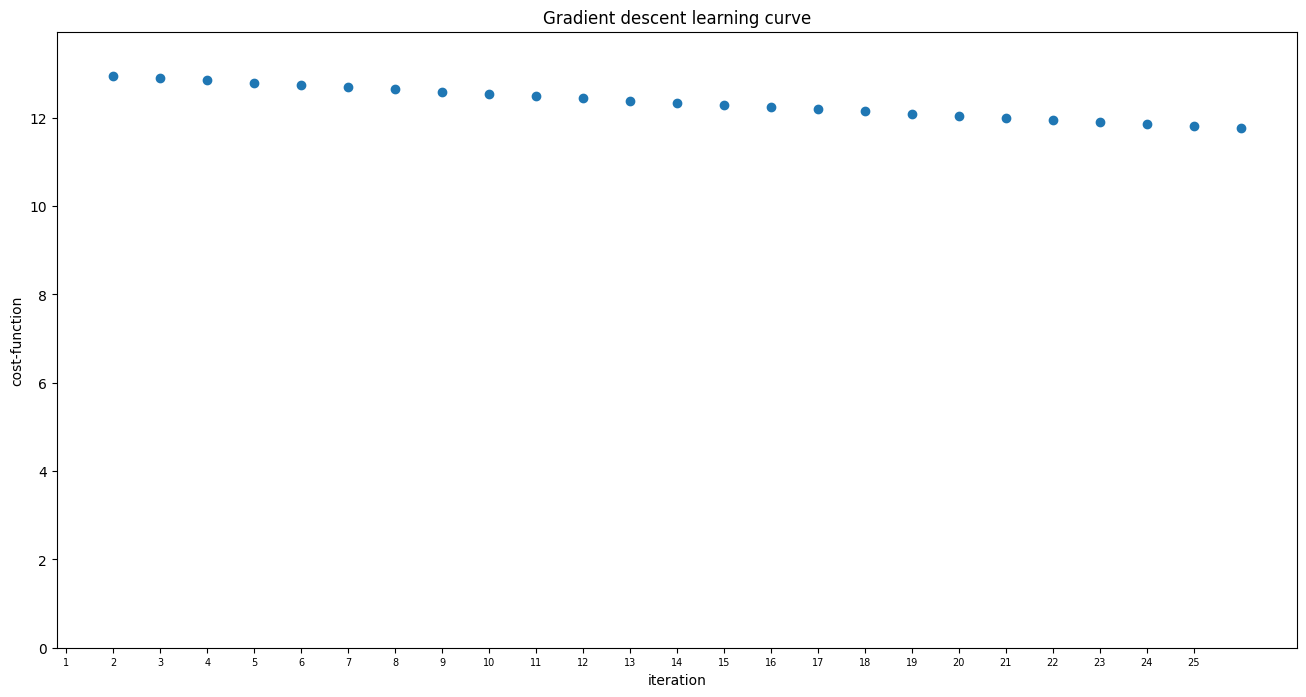

In [ ]:
values,checkpoints = descent(0.0,0.0,0.001,25)
print("\nThe calculated values of the cost function: ", values, "\n")
plt.rcParams["figure.figsize"] = (16,8)
learning_curve(checkpoints,values)

Expected outcome since we have seen from the previous experiments that the smaller the step the more the iterations needed from the algorithm to converge towards 0.0. Similarly to experiment 3.1.6 at least 400 iterations will need for the cost function to be minimized.

Streaming output truncated to the last 5000 lines.

Executing iteration: 1337/3000
Cost function value on iteration 1337: 0.06152

Executing iteration: 1338/3000
Cost function value on iteration 1338: 0.06127

Executing iteration: 1339/3000
Cost function value on iteration 1339: 0.06103

Executing iteration: 1340/3000
Cost function value on iteration 1340: 0.06078

Executing iteration: 1341/3000
Cost function value on iteration 1341: 0.06054

Executing iteration: 1342/3000
Cost function value on iteration 1342: 0.0603

Executing iteration: 1343/3000
Cost function value on iteration 1343: 0.06006

Executing iteration: 1344/3000
Cost function value on iteration 1344: 0.05982

Executing iteration: 1345/3000
Cost function value on iteration 1345: 0.05958

Executing iteration: 1346/3000
Cost function value on iteration 1346: 0.05934

Executing iteration: 1347/3000
Cost function value on iteration 1347: 0.0591

Executing iteration: 1348/3000
Cost function value on iteration 1348: 0.05887

Ex

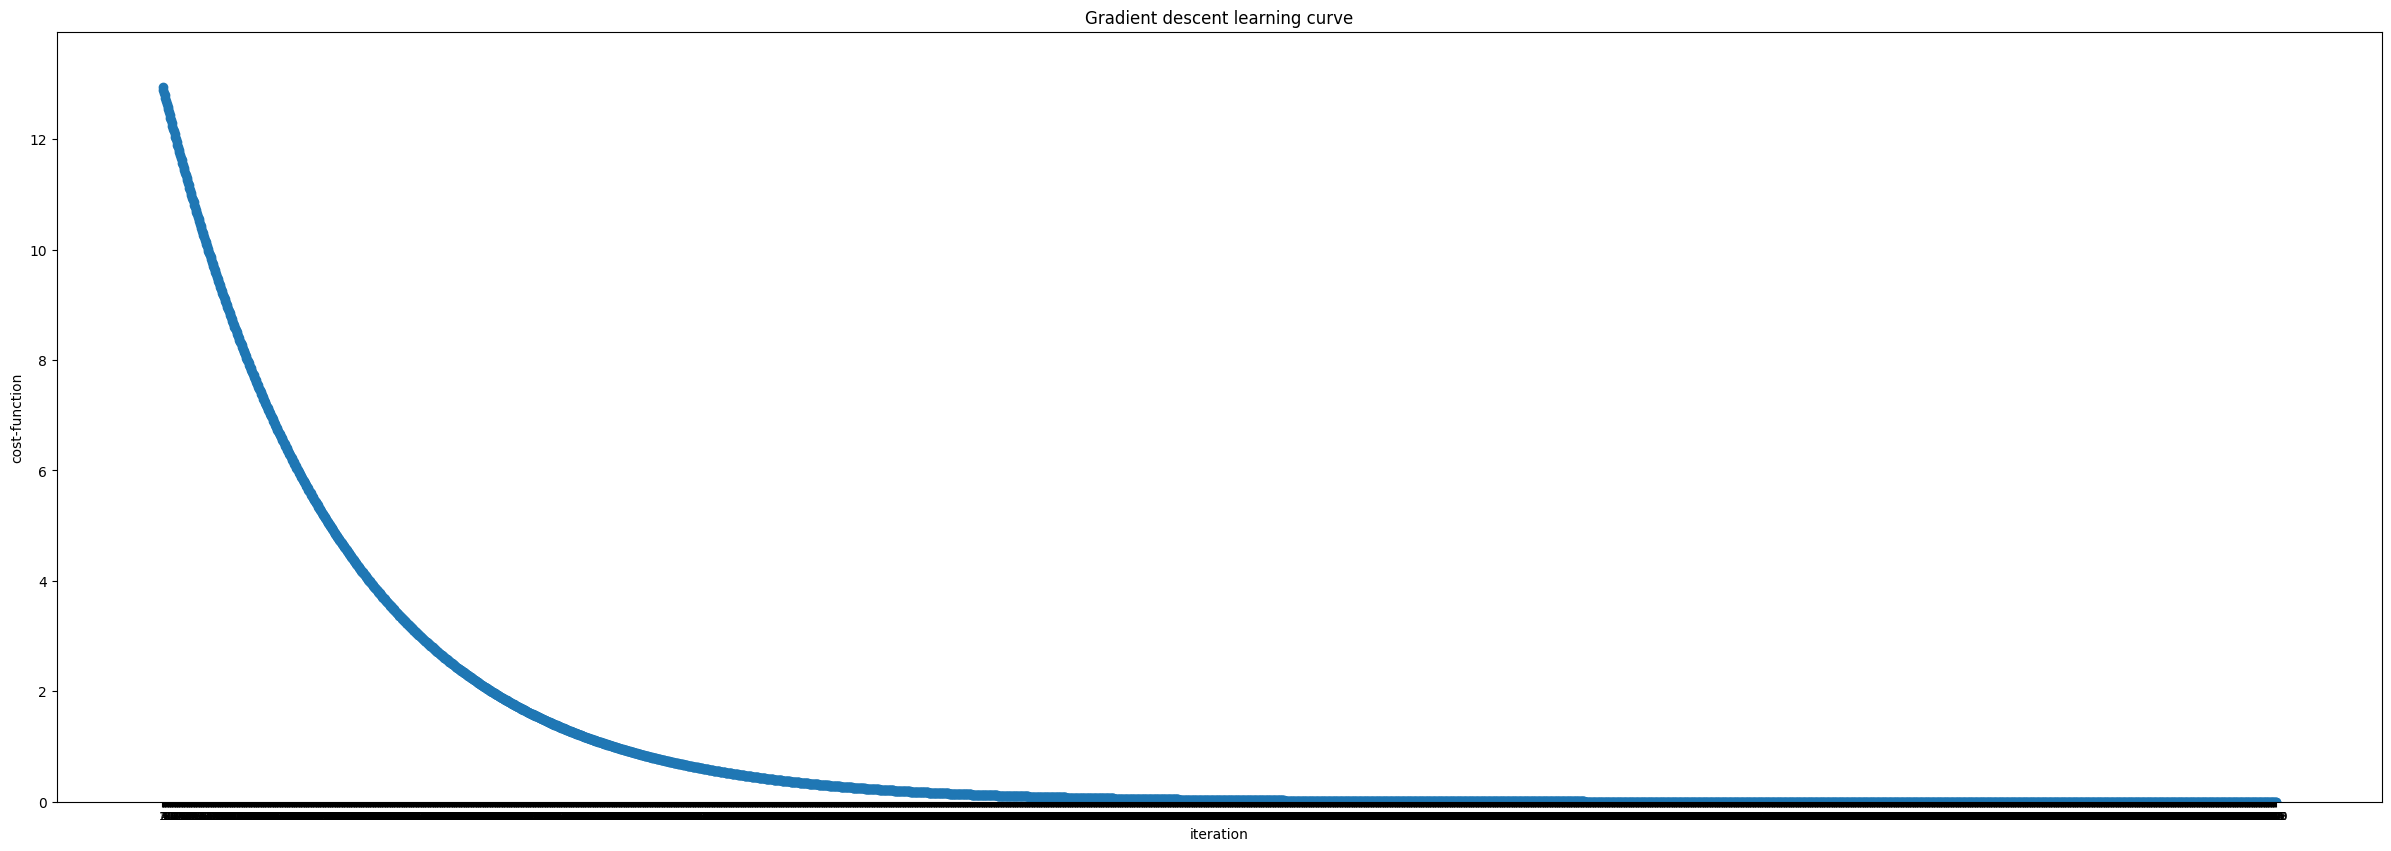

In [ ]:
values,checkpoints = descent(0.0,0.0,0.001,3000)
print("\nThe calculated values of the cost function: ", values, "\n")
plt.rcParams["figure.figsize"] = (30,10)
learning_curve(checkpoints,values)

At least 3,000 iterations need for the gradient descent algorithm to converge towards 0.0 for the first cost function. This is almost seven times (x7) the iterations needed when the learning rate was 0.01 in experiment 3.1.6

Streaming output truncated to the last 5000 lines.

Executing iteration: 1337/3000
Cost function value on iteration 1337: 0.41313

Executing iteration: 1338/3000
Cost function value on iteration 1338: 0.41147

Executing iteration: 1339/3000
Cost function value on iteration 1339: 0.40983

Executing iteration: 1340/3000
Cost function value on iteration 1340: 0.40819

Executing iteration: 1341/3000
Cost function value on iteration 1341: 0.40656

Executing iteration: 1342/3000
Cost function value on iteration 1342: 0.40494

Executing iteration: 1343/3000
Cost function value on iteration 1343: 0.40332

Executing iteration: 1344/3000
Cost function value on iteration 1344: 0.40171

Executing iteration: 1345/3000
Cost function value on iteration 1345: 0.4001

Executing iteration: 1346/3000
Cost function value on iteration 1346: 0.3985

Executing iteration: 1347/3000
Cost function value on iteration 1347: 0.39691

Executing iteration: 1348/3000
Cost function value on iteration 1348: 0.39532

Ex

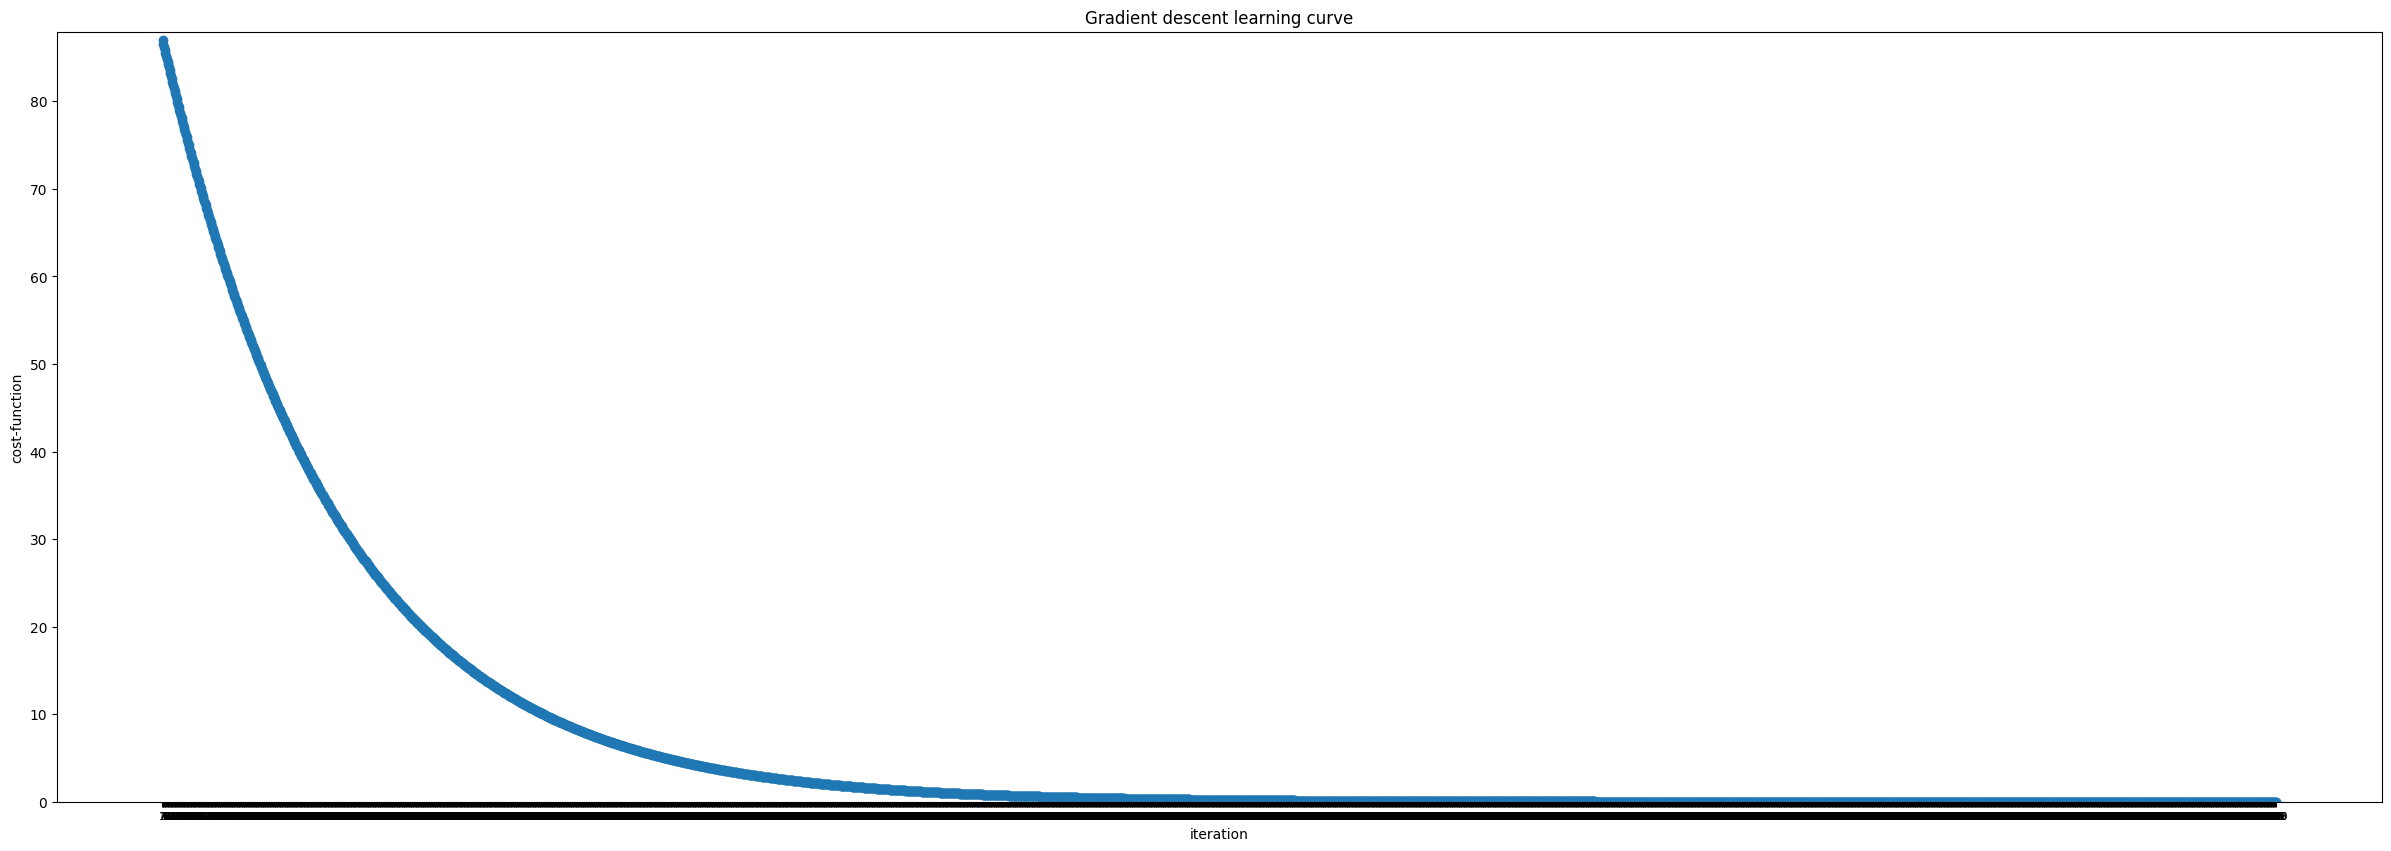

In [ ]:
values,checkpoints = descent(4.3,9.9,0.001,3000)
print("\nThe calculated values of the cost function: ", values, "\n")
plt.rcParams["figure.figsize"] = (30,10)
learning_curve(checkpoints,values)

An interesting outcome can be observed here. When the paramters $x_1$ and $x_2$ are intitiallised from 0.0 then at the 3000th iteration the value of the cost function is 0.00008 whereas when randomly initialised to value 4.3 and 9.9 respectively (like in experiment 3.1.5 then the algorithm after the same number of iterations converged to 0.00053. This means that when the paramaters are initialised with a positive number it will take more iterations for the algorith to converge towards 0.0.

##### Overall conclusions regarding the first cost function:

* The algorithm performed well for learning rates less than equal to 0.5. For higher learning rates the algorithm couldn't converge to a global/local minimum.

* The smaller the learning rate the more the iterations needs for the algorithm to converge towards 0.0.

* When the parameters of the cost function are not initialized from 0.0, it will take more iterations for the gradient descent algorithm to converge towards 0.0 for small leanring rates.

#### 3.2 Applyting the gradient descent algorithm for the second cost function

$f(x_1, x_2) = (1 - (x_2 - 3))^2  + 20((x_1 + 3) - (x_2 - 3)^2)^2$

As in the first cost function, I should calculate the derivatives of the current cost function with respect to $x_1$ and $x_2$.

$\frac{\partial f}{\partial x_1} = [(1 - (x_2 - 3))^2]' + [20((x_1 + 3) - (x_2 - 3)^2)^2]' = 0 + 20*2((x_1 + 3) - (x_2 -3)^2 = 40(x_1 + 3 - (x_2 - 3)^2)$ </br></br>
Note that the term $[(1 - (x_2 - 3))^2]'$ = 0 since the derivative of the constant is 0 

$\frac{\partial f}{\partial x_2} = [(1 - (x_2 - 3))^2]' + [20((x_1 + 3) - (x_2 - 3)^2)^2]'$

Let's split the above equation into two different parts:

(1) $\frac{\partial f}{\partial x_2} = [(1 - (x_2 - 3))^2]'$

(2) $\frac{\partial f}{\partial x_2} = [20((x_1 + 3) - (x_2 - 3)^2)^2]'$

Let $ z = 1- (x_2 - 3)$, then (1) becomes (after the application of the chain rule) = $\frac{d}{dz}z^2̇̇*\frac{d}{dx_2}(1 - (x_2 - 3))$

Using the power rule of differentiation $\frac{d}{dz}z^2 = 2z$ (3)

Using the chain rule of differentiation $\frac{d}{dx_2}(1 - (x_2 - 3)) = \frac{d}{dx_2}(1) - \frac{d}{d_x2}(x_2-3) = 0 - 1 = -1$ (4)

Now replacing expressions (3), (4) in (1) we have,

$[(1 - (x_2 - 3))^2]' = 2(1 - (x_2 - 3))(-1) = -2(1 - (x_2 - 3)) = -2(1 - x_2 +3) = -2(4-x_2)$ (5) </br></br>

Moving on to the second term $[20((x_1 + 3) - (x_2 - 3)^2)^2]'$ (2) I will apply the chain rule twice.</br></br>

First, I will differentiate the inner function $((x_1 + 3) - (x_2 - 3)^2)$ with respect to $x_2$.
$\frac{\partial}{\partial{x_2}}((x_1 + 3) - (x_2 - 3)^2) = \frac{\partial}{\partial{x_2}}(x_1 +3) - \frac{\partial}{\partial{x_2}}(x_2 - 3)^2 = 0 - 2(x_2 -3) = -2(x_2 -3)$ (6)

Now based on the chain rule of differentiation $f'(g(x))*g'(x)$ I have to find the derivative of the outer function $[20(z)^2]'$ and multiply by the derivatve of $z$ (6), where $z = ((x_1 + 3) - (x_2 - 3)^2)$. 

Thus,
$\frac{\partial f}{\partial x_2}[20((x_1 + 3) - (x_2 - 3)^2)^2]' = 40((x_1+3)-(x_2-3)^2) (-2(x_2 -3)) = -80(x_2 - 3)(x_1+3 - (x_2 -3)^2)$ (7)

Finally, let's use expressions (5) and (7) find the derivative of the cost function with respect to $x_2$:

$\frac{\partial f}{\partial x_2} = [(1 - (x_2 - 3))^2]' + [20((x_1 + 3) - (x_2 - 3)^2)^2]' = -2(4-x_2) - 80(x_2 - 3)(x_1+3 - (x_2 -3)^2) $

The methodology from now on, since I have differentiated the cost function with respect to $x_1$, $x_2$ is the same as the steps descripted for the first cost function.

In [ ]:
def grad_descent_v2(x1:float, x2:float, learning_rate:float, iterations:int):
  """
  Definition
  ---------
  Apply the gradient descent algorithm on a specific cost function. The cost function optimized is f(x1,x2) = (1-(x2-3))**2+20*((x1+3)-(x2-3)**2)**2

  Arguments
  ---------
  x1: The first predictive parameter of the cost function.
  x2: The second predictive parameter of the cost function.
  learning_rate: The step size applied on the gradient(s).
  iterations: The maximum number of iterations/repetitions of the GD algorithm.

  Output
  ---------
  The calculated cost per iteration, and the maximum number of iterations that have been applied or early stopped.
  """
  early_stopper = EarlyStopper()
  calculated_values = []
  iteration_checkpoint = []
  
  print(f"x1 parameter initialized with value: {x1}")
  print(f"x2 parameter initialized with value: {x2}")

  for iter in range(iterations):
    print(f"\nExecuting iteration: {iter+1}/{iterations}")
    gradient_x1 = 40*(x1+3-(x2-3)**2)
    gradient_x2 = -2*(4-x2)-80*(x2-3)*(x1+3-(x2-3)**2)
    x1 = x1 - learning_rate*gradient_x1
    x2 = x2 - learning_rate*gradient_x2

    #calculate the cost function
    f = (1-(x2-3))**2+20*((x1+3)-(x2-3)**2)**2
    # print(f"Cost function value on iteration {iter+1}: {np.round(f, 5)}")
    print(f"Cost function value on iteration {iter+1}: {f}")

    calculated_values.append(np.round(f, 5))
    iteration_checkpoint.append(iter+1)

    #early stopping
    stop_flag, cost_value = early_stopper.early_stop(f)
    if stop_flag:
      print(f"\nEarly stopping applied on iteration number: {iter+1}")
      break

  print("\n--------------------------End of optimization------------------------------------")
  
  print(f"\nThe computed value of x1 on last iteration: {x1}")
  print(f"The computed value of x2 on last iteration: {x2}")

  return calculated_values,iteration_checkpoint

##### 3.2.1 Execute the algorithm for the first cost function and with hyperparameters:
 * $x_1$ = 0
 * $x_2$ = 0
 * learning_rate/step ($a$) = 0.5
 * iterations = 10

In [ ]:
values,checkpoints = grad_descent_v2(0.0,0.0,0.5,10)
print("\nThe calculated values of the cost function: ", values, "\n")
learning_curve(checkpoints,values)

x1 parameter initialized with value: 0.0
x2 parameter initialized with value: 0.0

Executing iteration: 1/10
Cost function value on iteration 1: 5402136508880.0

Executing iteration: 2/10
Cost function value on iteration 2: 1.0094435881067787e+42

Executing iteration: 3/10
Cost function value on iteration 3: 6.583034563721081e+129

Executing iteration: 4/10


OverflowError: ignored

Python intepreter couldn't calculate the cost function after the 4th iteration due to very high cost results. Thus, it's safe to conclude that for this cost function a learning rate of **0.5** is considered a **very high learning rate**. There is no point to test the algorithm for higher learning rates. However, let's try to change the initialization values of $x_1$, $x_2$ by keeping the learning rate at 0.5

##### 3.2.2 Hyperparameters
 * $x_1$ = (initialize with a random number from numpy.random module)
 * $x_2$ = (initialize with a random number from numpy.random module)
 * learning_rate/step ($a$) = 0.5 (high)
 * iterations = 30

x1 parameter initialized with value: 3.8
x2 parameter initialized with value: 6.4

Executing iteration: 1/30
Cost function value on iteration 1: 36979471069342.484

Executing iteration: 2/30
Cost function value on iteration 2: 3.3983322941540714e+45

Executing iteration: 3/30
Cost function value on iteration 3: 2.636741302746154e+141

Executing iteration: 4/30
Cost function value on iteration 4: inf

Executing iteration: 5/30
Cost function value on iteration 5: inf

Executing iteration: 6/30
Cost function value on iteration 6: nan

Executing iteration: 7/30
Cost function value on iteration 7: nan

Executing iteration: 8/30
Cost function value on iteration 8: nan

Executing iteration: 9/30
Cost function value on iteration 9: nan

Executing iteration: 10/30
Cost function value on iteration 10: nan

Executing iteration: 11/30
Cost function value on iteration 11: nan

Executing iteration: 12/30
Cost function value on iteration 12: nan

Executing iteration: 13/30
Cost function value on iter

<ipython-input-24-840bbccf66c1>:33: RuntimeWarning: overflow encountered in double_scalars
  f = (1-(x2-3))**2+20*((x1+3)-(x2-3)**2)**2
<ipython-input-24-840bbccf66c1>:28: RuntimeWarning: overflow encountered in double_scalars
  gradient_x2 = -2*(4-x2)-80*(x2-3)*(x1+3-(x2-3)**2)
<ipython-input-24-840bbccf66c1>:30: RuntimeWarning: invalid value encountered in double_scalars
  x2 = x2 - learning_rate*gradient_x2


ValueError: ignored

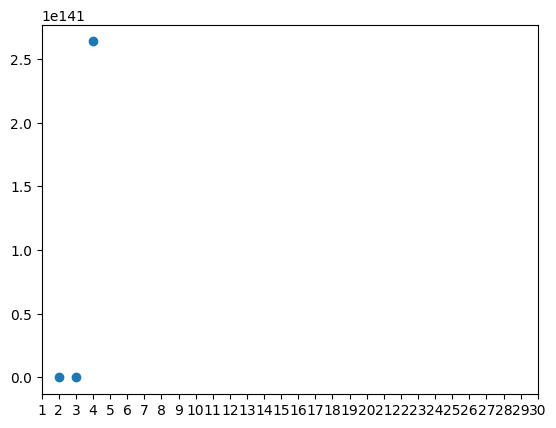

In [ ]:
values,checkpoints = grad_descent_v2(np.round(np.random.uniform(1,5),1), np.round(np.random.uniform(5,10),1),0.9,30)
print("\nThe calculated values of the cost function: ", values, "\n")
learning_curve(checkpoints,values)

Again the algorithm goes towards inf without converging at a global/local minimum. Let's now decrease the learning rate to a smaller value and set it equal to 0.01 and randomly initialize the parameters $x_1$ and $x_2$. Note that on this run the parameter $x_1$ will be initialized with a negative value.

##### 3.2.3 Hyperparameters
 * $x_1$ = (initialize with a random number from numpy.random module)
 * $x_2$ = (initialize with a random number from numpy.random module)
 * learning_rate/step ($a$) = 0.01 (small value)
 * iterations = 30

x1 parameter initialized with value: -1.1
x2 parameter initialized with value: 3.7

Executing iteration: 1/30
Cost function value on iteration 1: 16.47512974701625

Executing iteration: 2/30
Cost function value on iteration 2: 47.16648128633842

Executing iteration: 3/30
Cost function value on iteration 3: 1.1574068806216504

Executing iteration: 4/30
Cost function value on iteration 4: 0.9324768974387013

Executing iteration: 5/30
Cost function value on iteration 5: 1.2855668339946549

Executing iteration: 6/30
Cost function value on iteration 6: 0.9607916512201025

Executing iteration: 7/30
Cost function value on iteration 7: 1.2808535269953056

Executing iteration: 8/30
Cost function value on iteration 8: 0.9061931504561008

Executing iteration: 9/30
Cost function value on iteration 9: 1.1585739021291572

Executing iteration: 10/30
Cost function value on iteration 10: 0.7954289073776722

Executing iteration: 11/30
Cost function value on iteration 11: 0.9715156402828145

Executing it

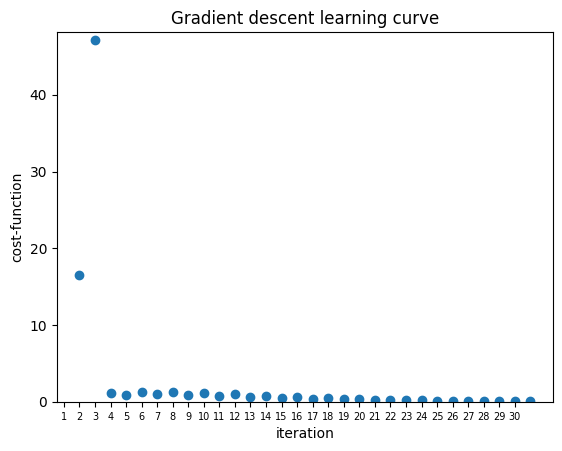

In [ ]:
values,checkpoints = grad_descent_v2(np.round(np.random.uniform(-5,-1),1), np.round(np.random.uniform(1,5),1),0.01,30)
print("\nThe calculated values of the cost function: ", values, "\n")
learning_curve(checkpoints,values)

Very promising results. The cost started very high (~close to 47.16 points) and then gradualy decreased to 0.05 after 30 iterations. Lets now increase the number of iterations and check when the algorithm will converge towards 0.0.

##### 3.2.4 Hyperparameters
 * $x_1$ = -1.1 (value from experiment 3.2.3)
 * $x_2$ = 3.7 (value from experiment 3.2.3)
 * learning_rate/step ($a$) = 0.01 (small value)
 * iterations = 3000

x1 parameter initialized with value: -1.1
x2 parameter initialized with value: 3.7

Executing iteration: 1/3000
Cost function value on iteration 1: 16.47512974701625

Executing iteration: 2/3000
Cost function value on iteration 2: 47.16648128633842

Executing iteration: 3/3000
Cost function value on iteration 3: 1.1574068806216504

Executing iteration: 4/3000
Cost function value on iteration 4: 0.9324768974387013

Executing iteration: 5/3000
Cost function value on iteration 5: 1.2855668339946549

Executing iteration: 6/3000
Cost function value on iteration 6: 0.9607916512201025

Executing iteration: 7/3000
Cost function value on iteration 7: 1.2808535269953056

Executing iteration: 8/3000
Cost function value on iteration 8: 0.9061931504561008

Executing iteration: 9/3000
Cost function value on iteration 9: 1.1585739021291572

Executing iteration: 10/3000
Cost function value on iteration 10: 0.7954289073776722

Executing iteration: 11/3000
Cost function value on iteration 11: 0.97151564

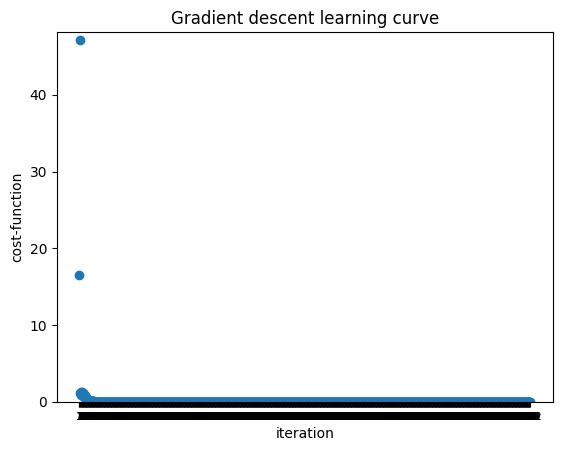

In [ ]:
values,checkpoints = grad_descent_v2(-1.1,3.7,0.01,3000)
print("\nThe calculated values of the cost function: ", values, "\n")
learning_curve(checkpoints,values)

The algorithm came very close to 0.0 after 1032 iterations after being stopped by the early stopping mechanism. The mechanism detected that for 3 consecutive iterations the cost didn't improve more than 0.000001 points thus it stopped the gradient descent algorithm.

Let's now move to an experiment were the values of the parameters are initialized to 0.0 with a small learning rate.

##### 3.2.5 Hyperparameters
 * $x_1$ = -1.1 (value from experiment 3.2.3)
 * $x_2$ = 3.7 (value from experiment 3.2.3)
 * learning_rate/step ($a$) = 0.0001 (very small value)
 * iterations = 100

x1 parameter initialized with value: -1.1
x2 parameter initialized with value: 3.7

Executing iteration: 1/100
Cost function value on iteration 1: 38.903090790132914

Executing iteration: 2/100
Cost function value on iteration 2: 37.96296746760889

Executing iteration: 3/100
Cost function value on iteration 3: 37.03195645878471

Executing iteration: 4/100
Cost function value on iteration 4: 36.11038133209617

Executing iteration: 5/100
Cost function value on iteration 5: 35.19856191929397

Executing iteration: 6/100
Cost function value on iteration 6: 34.296813435885895

Executing iteration: 7/100
Cost function value on iteration 7: 33.4054456048284

Executing iteration: 8/100
Cost function value on iteration 8: 32.52476178758441

Executing iteration: 9/100
Cost function value on iteration 9: 31.655058126705523

Executing iteration: 10/100
Cost function value on iteration 10: 30.796622704109456

Executing iteration: 11/100
Cost function value on iteration 11: 29.94973471920266

Executi

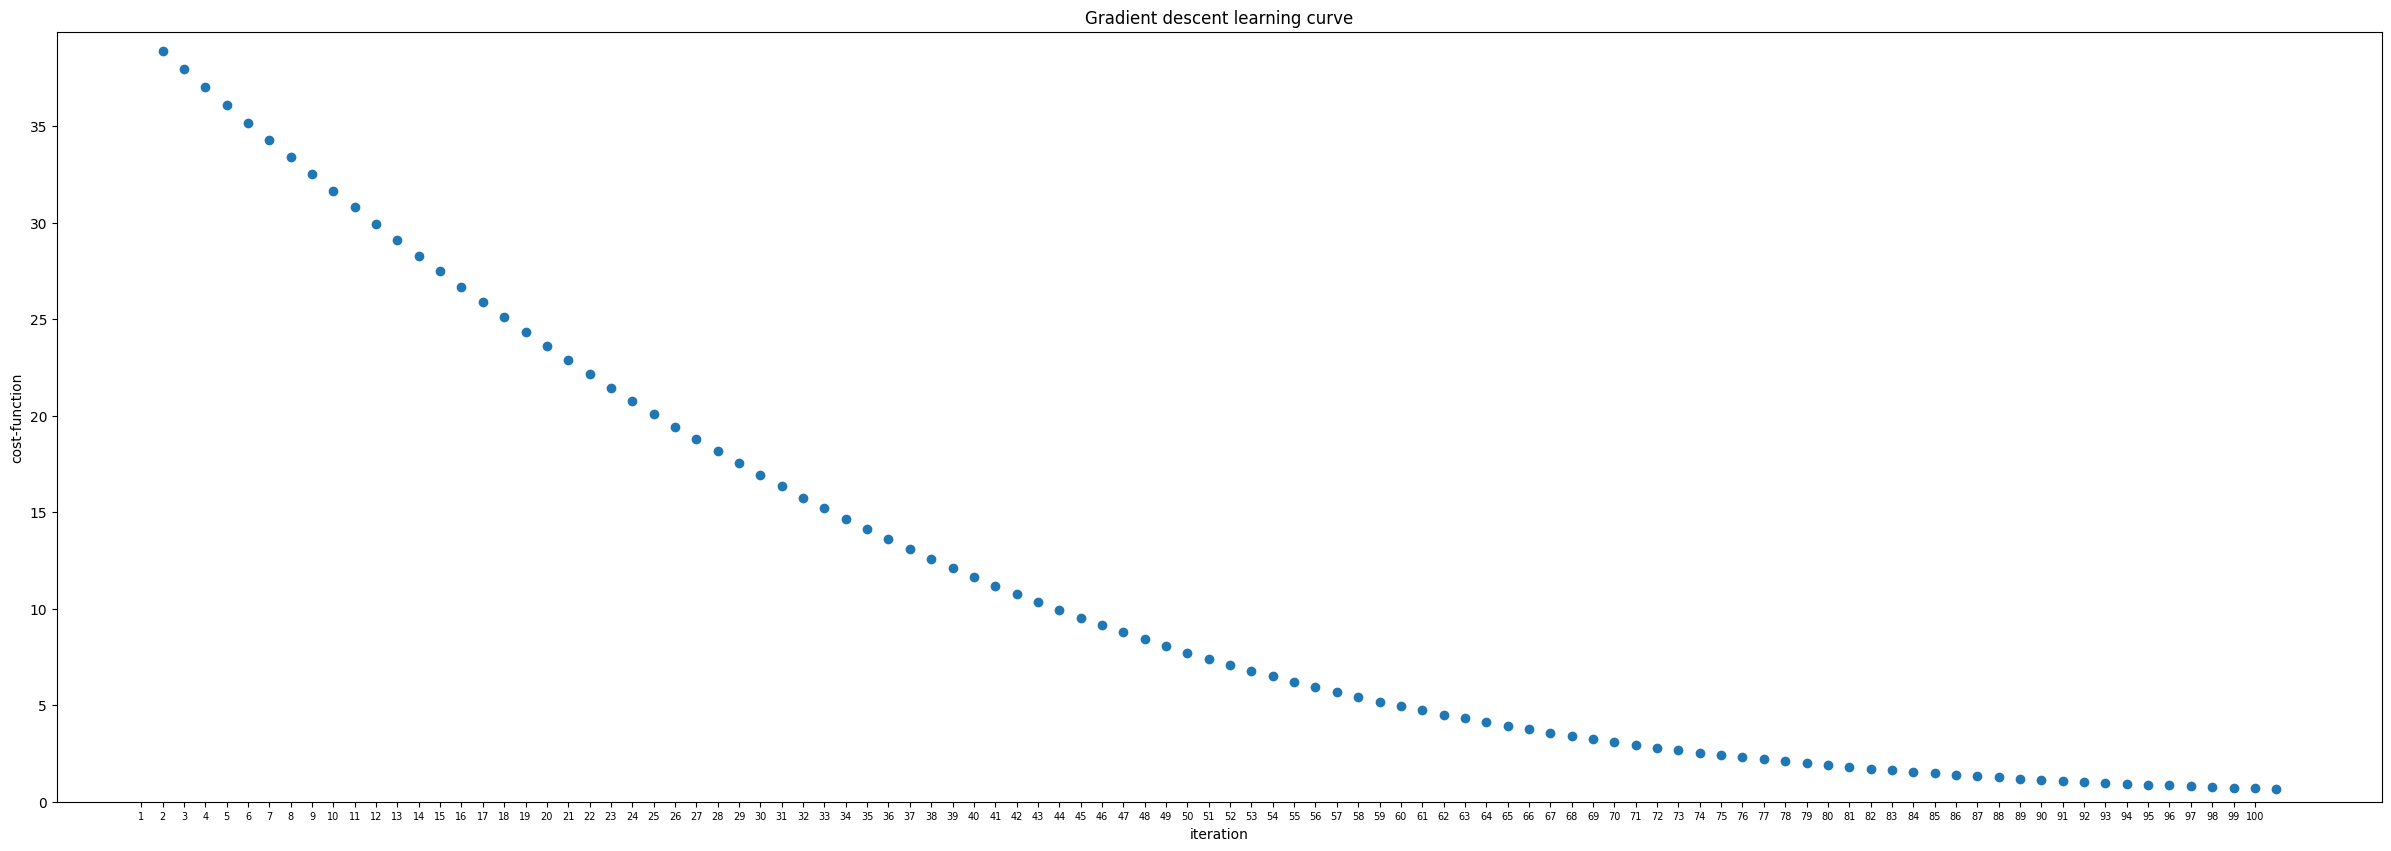

In [ ]:
values,checkpoints = grad_descent_v2(-1.1,3.7,0.0001,100)
print("\nThe calculated values of the cost function: ", values, "\n")
learning_curve(checkpoints,values)

As expected for a very small learning rate values the algorithm needs many more iterations (>1000) to converge

Streaming output truncated to the last 5000 lines.

Executing iteration: 18337/20000
Cost function value on iteration 18337: 0.024291571488462366

Executing iteration: 18338/20000
Cost function value on iteration 18338: 0.02429004886550887

Executing iteration: 18339/20000
Cost function value on iteration 18339: 0.02428852632723933

Executing iteration: 18340/20000
Cost function value on iteration 18340: 0.024287003873649918

Executing iteration: 18341/20000
Cost function value on iteration 18341: 0.02428548150473688

Executing iteration: 18342/20000
Cost function value on iteration 18342: 0.02428395922049636

Executing iteration: 18343/20000
Cost function value on iteration 18343: 0.024282437020924617

Executing iteration: 18344/20000
Cost function value on iteration 18344: 0.024280914906017716

Executing iteration: 18345/20000
Cost function value on iteration 18345: 0.024279392875771983

Executing iteration: 18346/20000
Cost function value on iteration 18346: 0.02427787093018357

Exe

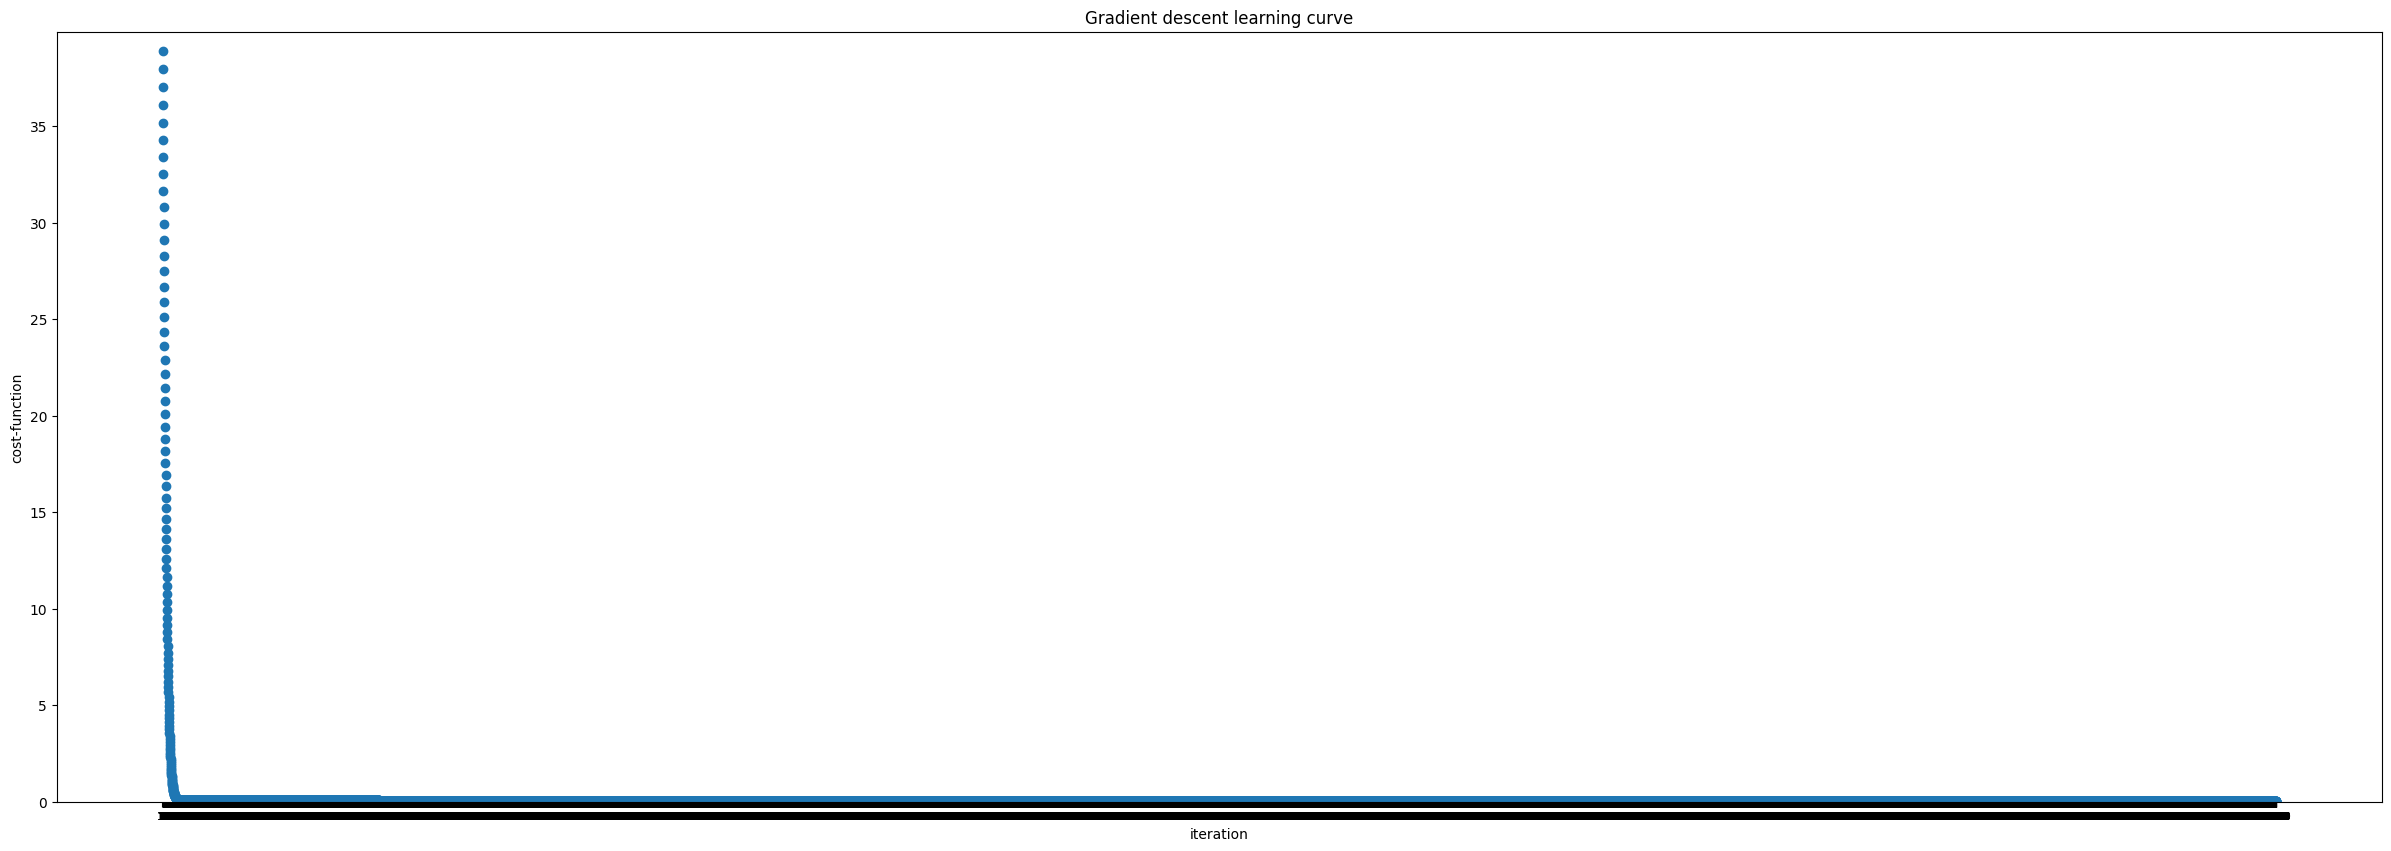

In [ ]:
values,checkpoints = grad_descent_v2(-1.1,3.7,0.0001,20000)
print("\nThe calculated values of the cost function: ", values, "\n")
learning_curve(checkpoints,values)

The algoithm needs at least 20,000 iterations to converge towards 0.0. Reaching a cost value of 0.0218 after 20,000 iterations for a very small learning rate (0.0001).

##### Overall conclusions regarding the second cost function:

* The algorithm performed well for learning rates less than equal to 0.01. For higher learning rates the algorithm couldn't converge to a global/local minimum. Moreover, the computed cost was going towards positive inf values.

* Initializing parameters $x_1$ and $x_2$ from [0.0, 0.0] had a negative impact on the algorithm.

* For better results and based on the outcomes of the above 5 experiments the $x_1$ should be randomly initiallized from a negative uniform distrubution between values [-2,-1]. On the contrary, parameter $x_2$ should be randomly initialized from a positive uniform distribution between values [3-5].